<a href="https://colab.research.google.com/github/shiralikadyrov/datasciencecoursera/blob/master/FaceRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications.resnet import ResNet101, preprocess_input
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

# Load the LFW dataset and prepare the data
# Assume you have your own code to load the LFW dataset
faces= fetch_lfw_people(min_faces_per_person=20 ,color = True, resize = None)
X,y = faces.images, faces.target
X = np.array(X)
y = np.array(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,stratify = y)

# Preprocess the images
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

print(len(set(y_test)))
print(len(set(y_train)))
# Convert labels to one-hot encoded vectors
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_train = to_categorical(y_train)
num_classes = len(label_encoder.classes_)
y_test = label_encoder.fit_transform(y_test)
y_test = to_categorical(y_test)
# Load the pre-trained ResNet50 model without the top classification layer
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(125, 94,3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add your own classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
#x = Dense(512, activation='relu')(x)
#x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
#x = Dense(32, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()


62
62
Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 125, 94, 3)  0           []                               
                                ]                                                                 
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 131, 100, 3)  0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 63, 47, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 63, 47, 64)   256         ['conv1_conv[0][0]'] 

In [ ]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
#model.fit(X_train, y_train, batch_size=32, epochs=500, validation_split=0.2)

model.fit(X_train, y_train, batch_size=32, epochs=500, validation_data=(X_test, y_test))
# Evaluate the model
#X_test_encoded = label_encoder.transform(y_test)
#y_test_encoded = to_categorical(X_test_encoded)
#loss, accuracy = model.evaluate(X_test, y_test_encoded)
#print("Test Loss:", loss)
#print("Test Accuracy:", accuracy)


Epoch 1/500
85/85 [==============================] - 13s 85ms/step - loss: 3.7561 - accuracy: 0.1662 - val_loss: 3.6783 - val_accuracy: 0.1749
Epoch 2/500
85/85 [==============================] - 5s 57ms/step - loss: 3.6887 - accuracy: 0.1754 - val_loss: 3.6654 - val_accuracy: 0.1749
Epoch 3/500
85/85 [==============================] - 5s 56ms/step - loss: 3.6837 - accuracy: 0.1754 - val_loss: 3.6570 - val_accuracy: 0.1749
Epoch 4/500
85/85 [==============================] - 5s 55ms/step - loss: 3.6742 - accuracy: 0.1754 - val_loss: 3.6563 - val_accuracy: 0.1749
Epoch 5/500
85/85 [==============================] - 5s 56ms/step - loss: 3.6665 - accuracy: 0.1754 - val_loss: 3.6407 - val_accuracy: 0.1749
Epoch 6/500
85/85 [==============================] - 5s 57ms/step - loss: 3.6529 - accuracy: 0.1754 - val_loss: 3.6452 - val_accuracy: 0.1749
Epoch 7/500
85/85 [==============================] - 5s 56ms/step - loss: 3.6476 - accuracy: 0.1754 - val_loss: 3.6260 - val_accuracy: 0.1749
Epoch

In [ ]:
X_test.shape

(1833, 62, 47, 3)

In [ ]:
y_test.shape

(1833, 999)

In [ ]:
X_train.shape

(7331, 62, 47, 3)

In [ ]:
y_train.shape

(7331, 1680)

In [ ]:
len(set(y_test))

TypeError: ignored

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

9/9 [==============================] - 0s 25ms/step - loss: 1.3935 - accuracy: 0.5504
Test Loss: 1.3934863805770874
Test Accuracy: 0.5503876209259033


In [ ]:
from scipy.ndimage import median_filter
X_test_median = []
for i in range(len(X_test)):
  filtered_img = adaptive_median_filter(X_test[i], 7) 
  X_test_median.append(filtered_img)

# Evaluate the model
X_test_encoded = label_encoder.transform(y_test)
y_test_encoded = to_categorical(X_test_encoded)
loss, accuracy = model.evaluate(np.array(X_test_median), y_test_encoded)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

9/9 [==============================] - 0s 40ms/step - loss: 1.3956 - accuracy: 0.5155
Test Loss: 1.3955614566802979
Test Accuracy: 0.5155038833618164


In [ ]:
from scipy.ndimage import gaussian_filter
X_test_gaussian = []
for i in range(len(X_test)):
  filtered_img = median_filter(X_test[i], size=3) 
  X_test_gaussian.append(filtered_img)

# Evaluate the model
X_test_encoded = label_encoder.transform(y_test)
y_test_encoded = to_categorical(X_test_encoded)
loss, accuracy = model.evaluate(np.array(X_test_gaussian), y_test_encoded)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

9/9 [==============================] - 0s 27ms/step - loss: 1.4081 - accuracy: 0.5078
Test Loss: 1.4080581665039062
Test Accuracy: 0.5077519416809082


In [ ]:
from scipy.ndimage import laplace
X_test_laplace = []
for i in range(len(X_test)):
  filtered_img = median_filter(X_test[i], size=3) 
  X_test_laplace.append(filtered_img)

# Evaluate the model
X_test_encoded = label_encoder.transform(y_test)
y_test_encoded = to_categorical(X_test_encoded)
loss, accuracy = model.evaluate(np.array(X_test_laplace), y_test_encoded)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

9/9 [==============================] - 0s 22ms/step - loss: 1.4081 - accuracy: 0.5078
Test Loss: 1.4080581665039062
Test Accuracy: 0.5077519416809082


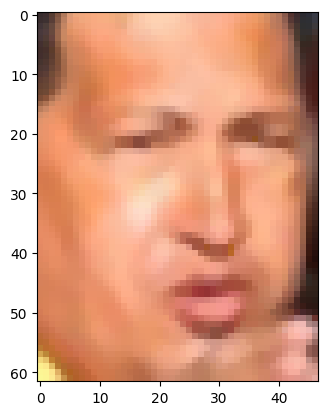

In [ ]:
import numpy as np
import cv2

def adaptive_median_filter(image, max_window_size):
    filtered_image = np.copy(image)
    height, width, depth = image.shape
    
    for n in range(depth):
      for i in range(height):
        for j in range(width):
            window_size = 3
            while window_size <= max_window_size:
                window_radius = window_size // 2
                window = image[max(i - window_radius, 0):min(i + window_radius + 1, height),
                               max(j - window_radius, 0):min(j + window_radius + 1, width),n]
                
                median = np.median(window)
                current_pixel = image[i, j, n]
                
                if current_pixel < np.min(window)*2 or current_pixel > np.max(window)/2:
                    filtered_image[i, j, n] = median
                    break
                else:
                    window_size += 2
                    
    return filtered_image

# Load the image
image = cv2.imread('/content/image.jpg')
image = X_test[0]
# Apply the adaptive median filter
filtered_image = adaptive_median_filter(image, max_window_size=7)

# Display the original and filtered images
plt.imshow(filtered_image)


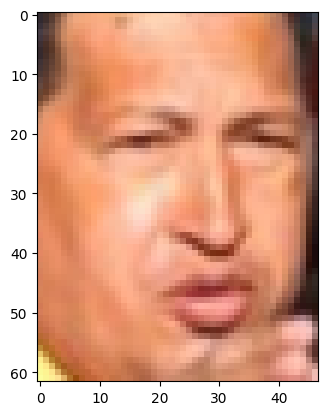

In [ ]:
plt.imshow(X_test[0])

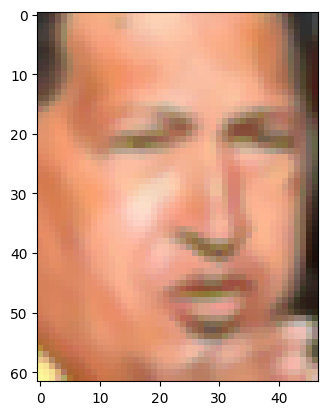

In [ ]:
type(image)
plt.imshow(median_filter(image, size=3))


In [ ]:
len(X_test)

258

In [ ]:
import numpy as np
from PIL import Image
from scipy.ndimage import median_filter

# Load and preprocess the image
def load_and_preprocess_image(image_path):
    img = Image.open(image_path)
    #img = img.resize((224, 224))  # Resize to VGG input size
    img = np.array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

# Apply median filter to an image
def apply_median_filter(image_path):
    img = Image.open(image_path)
    img = np.array(img)
    filtered_img = median_filter(img, size=3)  # Adjust the filter size as needed
    return Image.fromarray(filtered_img)

# Load VGG16 model with pre-trained weights
#base_model = VGG16(weights='imagenet')
#vgg_model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

# Load and preprocess the original image
image_path = '/content/image.jpg'
original_image = load_and_preprocess_image(image_path)

# Apply median filter to the image
filtered_image = apply_median_filter(image_path)


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications.resnet import ResNet101, preprocess_input
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

# Load the LFW dataset and prepare the data
# Assume you have your own code to load the LFW dataset
faces= fetch_lfw_people(min_faces_per_person=20 ,color = True, resize = None)
X,y = faces.images, faces.target
X = np.array(X)
y = np.array(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,stratify = y)

# Preprocess the images
#X_train = preprocess_input(X_train)
#X_test = preprocess_input(X_test)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.applications.resnet import ResNet101, preprocess_input
# Load pre-trained ResNet50 model
#base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
base_model = ResNet101(weights='imagenet', include_top=False, pooling='avg')
#base_model = tf.keras.Model(inputs=base_model.input, outputs=base_model.layers[-1].output)


# Define a function to extract face embeddings
def extract_face_embeddings(images):
    preprocessed_images = preprocess_input(images)
    embeddings = base_model.predict(preprocessed_images)
    return embeddings

# Prepare your training dataset
# Load face images of known individuals and assign labels

# Extract face embeddings for the training dataset
train_embeddings = extract_face_embeddings(X_train)
train_labels = y_train  # Replace with your training labels

# Set the random seed
np.random.seed(42)

# Train the k-NN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(train_embeddings, train_labels)

# Prepare your testing dataset
# Load face images for face recognition



85/85 [==============================] - 207s 2s/step


KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Extract face embeddings for the testing dataset
test_embeddings = extract_face_embeddings(X_test)

# Set the random seed
np.random.seed(42)

# Perform face recognition using k-NN
predicted_labels = knn_classifier.predict(test_embeddings)

# Evaluate the accuracy of the face recognition system
# Compare predicted labels with ground truth labels for testing dataset
accuracy = np.mean(predicted_labels == y_test)*100
print("Accuracy: {:.2f}%".format(accuracy))

10/10 [==============================] - 24s 2s/step
Accuracy: 0.99%


In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.resnet import ResNet101, preprocess_input
from tensorflow.keras.layers import Dense, Input, Lambda, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint

# Load the LFW dataset
lfw_dataset = fetch_lfw_people(min_faces_per_person=5, resize=0.1, color = True)
X = lfw_dataset.images
y = lfw_dataset.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the images and add channel dimension
X_train = preprocess_input(X_train)
X_train = np.expand_dims(X_train, axis=-1)
X_test = preprocess_input(X_test)
X_test = np.expand_dims(X_test, axis=-1)

# Convert the labels to one-hot encoding
num_classes = len(lfw_dataset.target_names)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Define the embedding dimension
embedding_dim = 128

# Create a base model using ResNet101
base_model = ResNet101(weights='imagenet', include_top=False, pooling='avg')

# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Define the inputs
anchor_input = Input(shape=X_train.shape[1:])
positive_input = Input(shape=X_train.shape[1:])
negative_input = Input(shape=X_train.shape[1:])

# Generate the embeddings
anchor_embedding = base_model(anchor_input)
positive_embedding = base_model(positive_input)
negative_embedding = base_model(negative_input)

# Define the triplet loss function
def triplet_loss(y_true, y_pred, alpha=0.3):
    anchor_embedding, positive_embedding, negative_embedding = y_pred[0], y_pred[1], y_pred[2]
    positive_distance = K.sum(K.square(anchor_embedding - positive_embedding), axis=-1)
    negative_distance = K.sum(K.square(anchor_embedding - negative_embedding), axis=-1)
    return K.sum(K.maximum(positive_distance - negative_distance + alpha, 0.0))

# Define the model
model = Model(inputs=[anchor_input, positive_input, negative_input], outputs=[anchor_embedding, positive_embedding, negative_embedding])

# Compile the model with the triplet loss
model.compile(optimizer=Adam(learning_rate=0.001), loss=triplet_loss)

# Train the model
history = model.fit([X_train, X_train, X_train], y_train, batch_size=32, epochs=10, validation_data=([X_test,X_test,X_test], y_test))

# Save the trained model
model.save("face_recognition_model.h5")


Epoch 1/10
150/150 [==============================] - 34s 102ms/step - loss: 1.0110 - resnet101_loss: 0.3370 - resnet101_1_loss: 0.3370 - resnet101_2_loss: 0.3370 - val_loss: 1.1323 - val_resnet101_loss: 0.3774 - val_resnet101_1_loss: 0.3774 - val_resnet101_2_loss: 0.3774
Epoch 2/10
150/150 [==============================] - 9s 58ms/step - loss: 1.0132 - resnet101_loss: 0.3377 - resnet101_1_loss: 0.3377 - resnet101_2_loss: 0.3377 - val_loss: 1.1323 - val_resnet101_loss: 0.3774 - val_resnet101_1_loss: 0.3774 - val_resnet101_2_loss: 0.3774
Epoch 3/10
150/150 [==============================] - 7s 49ms/step - loss: 1.0393 - resnet101_loss: 0.3464 - resnet101_1_loss: 0.3464 - resnet101_2_loss: 0.3464 - val_loss: 1.1323 - val_resnet101_loss: 0.3774 - val_resnet101_1_loss: 0.3774 - val_resnet101_2_loss: 0.3774
Epoch 4/10
150/150 [==============================] - 9s 58ms/step - loss: 0.9853 - resnet101_loss: 0.3284 - resnet101_1_loss: 0.3284 - resnet101_2_loss: 0.3284 - val_loss: 1.1323 - val

In [ ]:
# Evaluate the model on the test set
_, test_anchor_embeddings, _ = model.predict([X_test, X_test, X_test])

# Calculate the distance between anchor and test embeddings
distances = np.sum(np.square(test_anchor_embeddings - test_anchor_embeddings[:, np.newaxis]), axis=-1)

# Find the indices of the closest embeddings for each anchor embedding
closest_indices = np.argmin(distances, axis=-1)

# Calculate the accuracy
accuracy = np.mean(y_test.argmax(axis=-1) == y_test[closest_indices].argmax(axis=-1))

print("Accuracy:", accuracy)


NameError: ignored

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.resnet import ResNet101, preprocess_input
from tensorflow.keras.layers import Dense, Input, Lambda, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint

# Load the LFW dataset
lfw_dataset = fetch_lfw_people(min_faces_per_person=5, resize=0.1, color = True)
X = lfw_dataset.images
y = lfw_dataset.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the images and add channel dimension
X_train = preprocess_input(X_train)
X_train = np.expand_dims(X_train, axis=-1)
X_test = preprocess_input(X_test)
X_test = np.expand_dims(X_test, axis=-1)

# Convert the labels to one-hot encoding
num_classes = len(lfw_dataset.target_names)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


from tensorflow.keras.models import load_model

# Define the triplet loss function
def triplet_loss(y_true, y_pred, alpha=0.3):
    anchor_embedding, positive_embedding, negative_embedding = y_pred[0], y_pred[1], y_pred[2]
    positive_distance = K.sum(K.square(anchor_embedding - positive_embedding), axis=-1)
    negative_distance = K.sum(K.square(anchor_embedding - negative_embedding), axis=-1)
    return K.sum(K.maximum(positive_distance - negative_distance + alpha, 0.0))


# Load the saved model
model = load_model("face_recognition_model.h5", compile=False)

# Compile the loaded model (if necessary)
model.compile(optimizer=Adam(learning_rate=0.001), loss=triplet_loss)

X_test = X_test[:100]
y_test = y_test[:100]

# Evaluate the model on the test set
_, test_anchor_embeddings, _ = model.predict([X_test, X_test, X_test])

# Calculate the distance between anchor and test embeddings
distances = np.sum(np.square(test_anchor_embeddings - test_anchor_embeddings[:, np.newaxis]), axis=-1)

# Find the indices of the closest embeddings for each anchor embedding
closest_indices = np.argmin(distances, axis=-1)

# Calculate the accuracy
accuracy = np.mean(y_test.argmax(axis=-1) == y_test[closest_indices].argmax(axis=-1))

print("Accuracy:", accuracy)
